# [DF907_07]

## 7. 영상 어파인 (Affine) 변환

일반 Affine 변환 행렬을 만들기 위해, 제어점들을 정의할 필요가 있다. 제어점들을 설정한 뒤 어디에 맵핑하기를 원하는지를 결정한다. 이를 이용하여 원 영상을 평행사변형 모양의 영상으로 바꿔보자.

>Affine 변환은 선의 평행성을 유지하며 영상을 변환하는 작업이다. 즉, 이동, 확대, scale, 반전까지 포함이 된 변환이다. 기하학적 왜곡, 재배치 등의 문제를 해결하는 데 사용하는 Affine 변형을 알아보자. 기울어진 명함 이미지를 평평하게 만드는 것과 같은 작업을 연결해서 생각해도 이해에 도움이 된다.

In [1]:
# (1) 이미지를 컬러 이미지로 읽고 height와 width 출력
import cv2
import numpy as np

img = cv2.imread('DF907_01_01.jpg', 1) # mode : 1(color)
h = img.shape[0]
w = img.shape[1]
print('height :', h)
print('width :', w)

height : 225
width : 225


In [2]:
# 전단 변환 행렬 M : 한 축 방향으로 (x축) 밀어서 평행사변형 모양이 되게끔
# 영상의 원점은 그대로 고정
M = np.float32([[1, 0.5, 0],[0, 1, 0]])

In [3]:
img_affined = cv2.warpAffine(img, M, (w, h))
cv2.imshow('affined', img_affined)

cv2.waitKey(0)
cv2.destroyAllWindows()

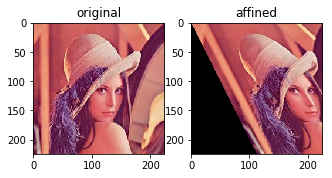

In [4]:
# 표에 이미지 표시하기
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(8, 4)) # w, h의 비율에 맞춰서 figsize setting
plt.subplots_adjust(wspace=0.2) # subplot 간의 간격

'''
# sol1) BGR(Opencv)를 RGB(matplotlib)로 보여주도록 swap & merge
b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 merge

b, g, r = cv2.split(img_R)   # img파일을 b,g,r로 분리
img_R2 = cv2.merge([r,g,b]) # b, r을 바꿔서 merge
'''
# sol2) cv2.cvtColor(img, cv2.BGR2RGB)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_affined1 = cv2.cvtColor(img_affined, cv2.COLOR_BGR2RGB)

plt.subplot(1,3,1)
plt.imshow(img1)
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(img_affined1)
plt.title('affined')

plt.show()

아핀 변환에서 원본 이미지의 모든 평행선은 출력 이미지에서 여전히 평행합니다.   

아핀 변환 행렬을 찾으려면 입력 이미지의 3점과 대응하는 출력 이미지의 3점이 필요합니다.  



getAffineTransform 함수를 사용하면 대응하는 3점 쌍에 대한  변환 행렬을 구할 수 있습니다.  

warpAffine함수를 사용하여 변환을 실행합니다.  

## [ 영상 크기 조절 (Resize) ]

### < cv2.resize(img, dsize=(w,h), interpolation=cv2.~) >
* dsize = (640, 480) 이렇게 크기를 아예 지정하거나,
* desize = (img.shape[1]* 2, img.shape[0]//2) 이렇게 shape를 이용하거나,
* desize = (0,0), fx = 0.5, fy = 1.4 이렇게 x, y의 배율을 정해줘도 됨!

### < 영상 보간 (interpolation) 속성 >
* **cv2.INTER_LINEAR** : **'쌍 선형 보간법'**, 기본적으로 **가장 많이** 사용됨 (**default!**)
* **cv2.INTER_CUBIC** : **'바이큐빅 보간법'**, 이미지를 **확대**하는 경우 많이 사용됨
* **cv2.INTER_AREA** : **'영역 보간법'**, 이미지를 **축소**하는 경우 많이 사용됨

## [ 영상 뒤집기(Flip) ]

### < cv2.flip(img, mode) >
* cv2.flip(img, 1) ==> **1이면 좌우 반전**(수평 뒤집기)
* cv2.flip(img, 0) ==> **0이면 상하 반전**(수직 뒤집기)

### <cv2.cvtColor(img, cv2.COLOR_BRG2RGB) >
* **plt**에 이미지 표시할 때 나타나는 색상 변화 문제를 해결할 수 있다! (RGB vs BGR)
* cvtColor 함수의 두 번째 인자인 **코드(cv2.COLOR_)**에 따라서 다양한 방식으로 **이미지의 색상을 변환해 저장**할 수 있다!

## [ 영상 이동(Translation) 및 회전(Rotation) ]

### < cv2.warpAffine(img, M, (col, row)) >
* cv2.warpAffine(src, 변환행렬 M, output 크기(x, y))
* **M에 따라** 다양한 기하학적 변환 가능!
    * ex. translation(이동), rotation(회전), scale(확대, 축소)  

<hr>  

#### 1.  **이동** 변환 M : **np.float32([[1, 0, tx],[0, 1, ty]])**   
    ==> tx와 ty는 각각 x축, y축 방향으로 이동 크기
#### 2.  **회전** 변환 M : **cv2.getRotationMatrix2D(center(x,y), angle, scale)**  
    ==> 회전 변환 행렬 생성 함수
>OpenCV에서 영상의 **x축**은 **width**이므로, **col**먼저!  
>cf.파이썬에서, **img.shape** : (**행, 열**, 채널수) == (**h, w**, 채널수) == (**rows, cols**, 채널수) 

> YUV와 HSV는 plot에 나타내면 색깔 다르게 나타나는 현상에 대해서... (gray는 cmap="gray"으로 해결)  
(참고 링크 : https://matplotlib.org/tutorials/introductory/images.html)  
(내 깃헙 issue : https://github.com/Jiwon-Hwang/Dafit/issues/2 : bgr to rgb)